### Euler's method 
>Euler's method is a numerical method to solve first order first degree differential equation with a given initial value. 
<img src=attachment:image.png width=150>
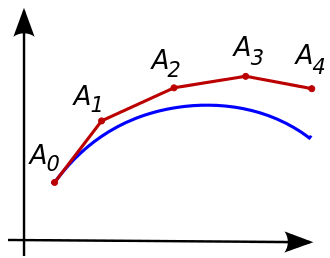

- There is some rule that determines the rate of change of s that depends on s: 
$$\frac{ds}{dt} = f_s(s,t)$$
- If we have a rule like this, and we know the initial state of the system, Euler's method allows us to estimate the state at a later time.

$$\frac{\Delta s}{\Delta t} \approx \frac{ds}{dt} = f_s(s,t)$$

$$\Delta s \approx f_s(s,t) \Delta t$$

$$s_{\rm new} = s_{\rm old} + \Delta s$$

#### Radioactive Decay example
In radioactive decay the rate of decay is proportional to the number of radioactive nuclei in the sample at any given time.

**s** = number of nuclei left

$$\frac{ds}{dt} = f_s(s,t) = - \lambda s$$
    
Let's say we start with s=100 nuclei, $\lambda=0.01$ (1 per 100 seconds of time per source nucleon). How many nuclei will be left after 10 seconds? 

- Analytic solution $ s=s_0e^{-0.01t}$  

In [1]:
import numpy as np

s = 100. * np.e**(-0.1)
print(s)

90.48374180359595


- Let dt=1.0

In [2]:
lambda_=0.01
dt=1.0
s=s0=100.0
t=0.0

def f_s(s,t):         # define a function that describes the rate of change of 's'
    return -lambda_*s

print ('t     s')     
for i in range(11):
    print (t,s)       
    ds = f_s(s,t)*dt  # compute the change in 's' using the 'rule' that ds/dt = f(s,t)
    s = s + ds      
    t = t + dt

t     s
0.0 100.0
1.0 99.0
2.0 98.01
3.0 97.02990000000001
4.0 96.05960100000001
5.0 95.09900499000001
6.0 94.14801494010001
7.0 93.20653479069901
8.0 92.27446944279203
9.0 91.3517247483641
10.0 90.43820750088047


- Let dt=0.001

In [3]:
lambda_=0.01
dt=0.001
s=s0=100.0
t=0.0

def f_s(s,t):         # define a function that describes the rate of change of 's'
    return -lambda_*s

print ('t     s')     
for i in range(10001):
    if i%1000==0:
        print (t,s)       
    ds = f_s(s,t)*dt  # compute the change in 's' using the 'rule' that ds/dt = f(s,t)
    s = s + ds      
    t = t + dt

t     s
0.0 100.0
1.0000000000000007 99.00497842463484
1.9999999999998905 98.01985752862426
2.9999999999997806 97.04453879807218
3.9999999999996705 96.07892469931771
5.000000000000004 95.12291866918062
6.000000000000338 94.17642510530521
7.000000000000672 93.23934935659989
8.000000000001005 92.31159771377149
9.000000000000451 91.39307739995509
9.999999999999897 90.48369656143524


### Taylor Series

In [4]:
import numpy as np
import matplotlib.pyplot as plt

s=1.0
x_=np.linspace(1.03,1.2,100)
U_0=1.0

U=U_0*((s/x_)**12-(s/x_)**6)

plt.plot(x_,U, 'k')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
from sympy import *
from sympy import lambdify

In [6]:
init_printing(pretty_print=True)

In [7]:
x=symbols('x', real=True)
U=((1/x)**12-(1/x)**6)

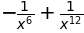

In [8]:
U

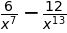

In [9]:
U_prime=U.diff(x)
U_prime

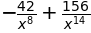

In [10]:
U_pp = U_prime.diff(x)
U_pp

 Taylor series 
 $$ f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2+ \dots$$

In [11]:
a=1.125
U_Taylor= U.subs(x, a) + U_prime.subs(x,a)*(x-a) + U_pp.subs(x,a)/2.*(x-a)**2

In [12]:
U_Taylor

In [13]:
lamda_taylor = lambdify(x, U_Taylor, modules=['numpy'])
lamda_U = lambdify(x, U, modules=['numpy'])

In [14]:
y_taylor = lamda_taylor(x_)
y_U = lamda_U(x_)

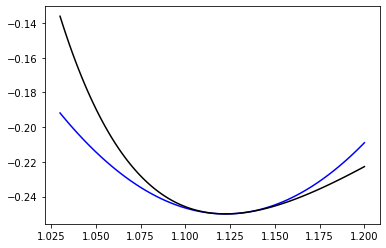

In [15]:
plt.plot(x_, y_taylor, 'b')
plt.plot(x_,y_U, 'k')
plt.show()